## 1. Import necessasry libraries

In [1]:
import pandas as pd

## 2. Import data

In [2]:
claimants_data = pd.read_csv('claimants.csv')
claimants_data

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


### 3. Data Understanding

In [4]:
claimants_data.shape

(1340, 7)

In [5]:
claimants_data.dtypes

CASENUM       int64
ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

In [6]:
claimants_data.isna().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [8]:
claimants_data.head(25)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
5,97,0,1.0,1.0,0.0,35.0,0.309
6,10,0,0.0,1.0,0.0,9.0,3.538
7,36,0,1.0,1.0,0.0,34.0,4.881
8,51,1,1.0,1.0,0.0,60.0,0.874
9,55,1,0.0,1.0,0.0,NaN,0.350


## 4. Data Preparation

In [3]:
del claimants_data['CASENUM']

In [4]:
claimants_data.dropna(axis=0,inplace=True)

In [12]:
claimants_data.shape

(1096, 6)

In [13]:
claimants_data.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

## 5. Model Building

2 Steps in Model Building:

1. Separate your input and output.
2. Model Validation techiques - train_test_split, KFold, LOOCV.

In [5]:
X = claimants_data.drop( labels=['ATTORNEY'], axis=1)
y = claimants_data[['ATTORNEY']]

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 12345)
#To pick up the same samples for training n number of times.

In [120]:
X_train

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
631,0.0,0.0,0.0,50.0,0.010
178,1.0,1.0,0.0,4.0,4.117
1060,1.0,1.0,0.0,63.0,4.504
684,1.0,0.0,0.0,19.0,5.400
215,1.0,1.0,0.0,77.0,0.944
...,...,...,...,...,...
948,0.0,1.0,0.0,4.0,1.445
665,0.0,1.0,0.0,39.0,4.308
468,1.0,1.0,0.0,1.0,3.407
161,0.0,1.0,0.0,10.0,0.375


In [18]:
X_train.shape,y_train.shape #Training samples

((876, 5), (876, 1))

In [19]:
X_test.shape,y_test.shape

((220, 5), (220, 1))

## 6. Model Training

In [11]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression() #Initialization #Explore - class_weight=None,
log_model.fit(X_train,y_train)


from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=4,) #Prunning
dt_model.fit(X_train,y_train)


from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train,y_train)

gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier()

In [26]:
log_model.coef_

array([[ 0.35680679,  0.67570996, -0.57875527,  0.00657283, -0.39132083]])

In [27]:
log_model.intercept_

array([-0.20995559])

In [10]:
dt_model.feature_importances_

array([0.01446806, 0.        , 0.02681113, 0.08063936, 0.87808146])

In [9]:
rf_classifier.feature_importances_

array([0.0172111 , 0.01418506, 0.01051958, 0.29704963, 0.66103462])

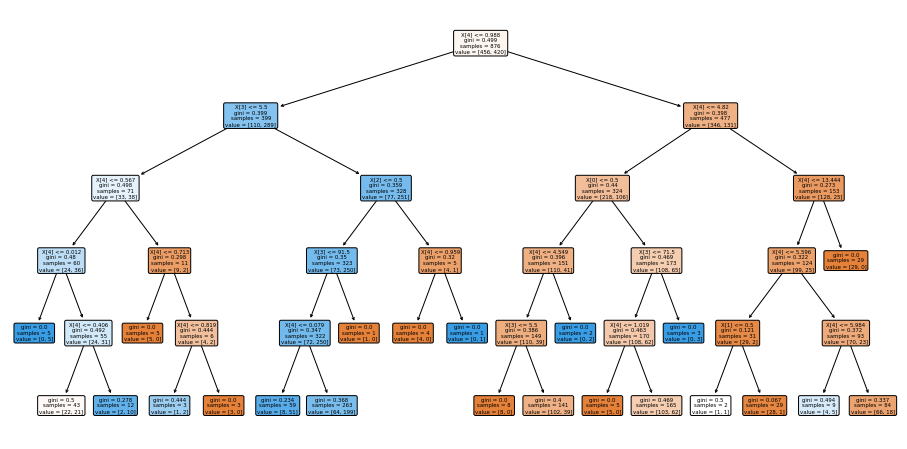

In [21]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(16,8))
plot_tree(dt_model,filled=True, rounded=True)
plt.show()

## 7. Model Testing

##### Training data

In [12]:
y_pred_train = gb_classifier.predict(X_train)
y_pred_train

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,

##### Test data

In [13]:
y_pred_test = gb_classifier.predict(X_test)

## 8. Model Evaluation

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,roc_auc_score,roc_curve

##### Training accuracy

In [15]:
accuracy_score(y_train,y_pred_train)

0.776255707762557

In [25]:
print(confusion_matrix(y_train,y_pred_train))

[[377  79]
 [142 278]]


In [26]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.73      0.83      0.77       456
           1       0.78      0.66      0.72       420

    accuracy                           0.75       876
   macro avg       0.75      0.74      0.74       876
weighted avg       0.75      0.75      0.75       876



In [27]:
precision_score(y_train,y_pred_train)

0.7787114845938375

In [28]:
recall_score(y_train,y_pred_train)

0.6619047619047619

0.744329573934837


Text(0, 0.5, 'True Positive Rate')

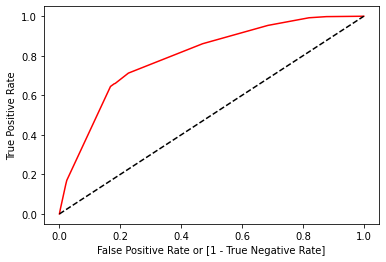

In [29]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y, dt_model.predict_proba (X)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

##### Test Accuracy

In [16]:
accuracy_score(y_test,y_pred_test)

0.740909090909091

### 9. Model Deployment

In [42]:
from pickle import dump

In [43]:
dump(log_model,open('claimants_log_model.pkl','wb'))

In [44]:
from pickle import load

In [46]:
loaded_pkl_file = load(open('claimants_log_model.pkl','rb'))

In [48]:
predicted_answers = loaded_pkl_file.predict(X_test)

In [49]:
accuracy_score(y_test,predicted_answers)

0.6863636363636364

### =========================================================================================

### How to get the optimum parameters for the given dataset at once?

In [ ]:
DecisionTreeClassifier()

In [50]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator  = dt_model,
                           param_grid = {'criterion': ['gini','entropy'],
                                         'max_depth' : [4,5,6,7,8,9,10]},
                           cv=5)
grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10]})

In [51]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [52]:
grid_search.best_score_

0.7290037359900374

### Stacking Technique

In [18]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [28]:
stacking_model = VotingClassifier(estimators = [('log_model',LogisticRegression()),
                                                ('dt_model',DecisionTreeClassifier()),
                                                ('svm_model',SVC())])
stacking_model.fit(X_train,y_train)

VotingClassifier(estimators=[('log_model', LogisticRegression()),
                             ('dt_model', DecisionTreeClassifier()),
                             ('svm_model', SVC())])

In [29]:
y_pred_test = stacking_model.predict(X_test)

In [30]:
accuracy_score(y_test,y_pred_test)

0.7

### K-Fold Cross Validation

In [39]:
from sklearn.model_selection import cross_val_score,LeaveOneOut #KFold
log_model = LogisticRegression()
LeaveOneOut()

cv_score = cross_val_score(estimator = log_model,X = X,y=y,cv=5)
print('CV Scores       : ',cv_score)
print('Mean Accuracy   : ',round(cv_score.mean(),4))
print('Stand.Deviation : ',round(cv_score.std(),4))

CV Scores       :  [0.71363636 0.69863014 0.69863014 0.70319635 0.70776256]
Mean Accuracy   :  0.7044
Stand.Deviation :  0.0057


### Explore

1. LOOCV
2. Isolation Forest
3. ExtraTree Classifier

### THE END OF THE LIFE CYCLE